# 1.EDA 

`EDA will help us to understand data more clearly. with the help of EDA, we can add important features using Feature Engineering techniques which helps us to increase AUC score or we can remove unimportant features which helps us to reduce the size of data.`

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from nltk.tokenize import TweetTokenizer   
from wordcloud import WordCloud, STOPWORDS

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. basic understanding about data.
* train.csv — the training set, which includes toxicity labels and subgroups
* test.csv — the test set, which does not include toxicity labels or subgroups
* sample_submission.csv — a sample submission file in the correct format

* Loading train data

In [2]:
Data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Self case study 2\Data\jigsaw-unintended-bias-in-toxicity-classification\train.csv")

In [3]:
Data.head()

id    target                                       comment_text  \
0  59848  0.000000  This is so cool. It's like, 'would you want yo...   
1  59849  0.000000  Thank you!! This would make my life a lot less...   
2  59852  0.000000  This is such an urgent design problem; kudos t...   
3  59855  0.000000  Is this something I'll be able to install on m...   
4  59856  0.893617               haha you guys are a bunch of losers.   

   severe_toxicity  obscene  identity_attack   insult  threat  asian  atheist  \
0         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
1         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
2         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
3         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
4         0.021277      0.0         0.021277  0.87234     0.0    0.0      0.0   

   ...  article_id    rating  funny  wow  sad  likes  disagree  \
0  ...        2006  rejected      0    0    0      0         0   
1  ...        2006  rejected      0    0    0      0         0   
2  ...        2006  rejected      0    0    0      0         0   
3  ...        2006  rejected      0    0    0      0         0   
4  ...        2006  rejected      0    0    0      1         0   

   sexual_explicit  identity_annotator_count  toxicity_annotator_count  
0              0.0                         0                         4  
1              0.0                         0                         4  
2              0.0                         0                         4  
3              0.0                         0                         4  
4              0.0                         4                        47  

[5 rows x 45 columns]

* Basic understanding about data 

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

### About train data.
* dataset contain 45 columns, out of 45 the 25 columns we are going to use  as subgroup , 7 columns are targets which we dont have to predict as part of this competation. 1 colums (target)  which contain toxicity score between 0-1.
* Only identities with more than 500 examples in the test set (combined public and private) will be included in the evaluation calculation. These identities are shown in bold.
    * Male
    * female
    * transgender
    * other_gender
    * heterosexual
    * homosexual_gay_or_lesbian
    * bisexual
    * other_sexual_orientation
    * christian
    * jewish
    * muslim
    * hindu
    * buddhist
    * atheist
    * other_religion
    * black
    * white
    * asian
    * latino
    * other_race_or_ethnicity
    * physical_disability
    * intellectual_or_learning_disability
    * psychiatric_or_mental_illness
    * other_disability
* `For all subgroup we have some probability score which is means that probability that, given subgroup/identity present in comment `

* Checking wheather column (comment_text and target) contain null values or not.

In [12]:
print('number of null values in comment_text :' ,Data['comment_text'].isnull().sum(axis = 0))
print('number of null values in target :',Data['target'].isnull().sum(axis = 0))

number of null values in comment_text : 0
number of null values in target : 0


* as target data is in flot64(which is probability values), we have to convert them into 0 and 1 ,
    * 0 ==> Toxic
    * 1 ==> Non Toxic

In [3]:
Data['class'] = Data['target'].apply(lambda x: "non-toxic" if x < 0.5 else "toxic")

## 1. Diatribution of target values 

In [43]:
import numpy as np

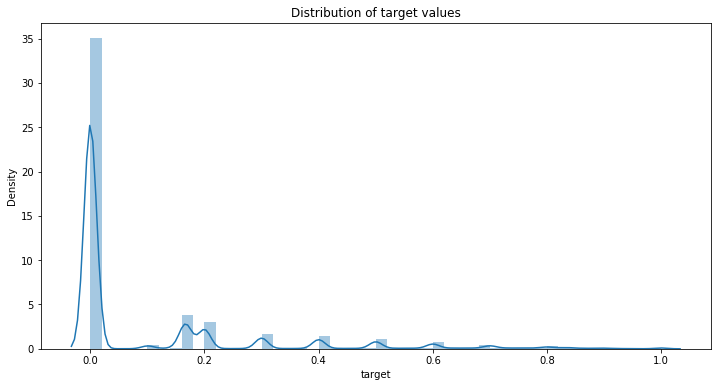

In [65]:
import seaborn as sns, numpy as np
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(Data['target'],ax=ax).set(title='PDF of target values')

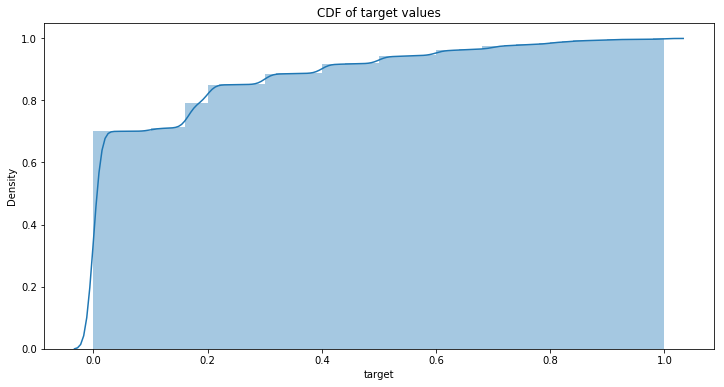

In [66]:
# https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
kwargs = {'cumulative': True}
# sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.distplot(Data['target'],ax=ax,hist_kws=kwargs, kde_kws=kwargs).set(title='CDF of target values')

### Observation :
* we can see there are almost 70 %  data having target values<=0.1
* this also mean that there is 70 % data having  high confidence that it belong to Non toxic class.

## 1. Distribution of data.

In [2]:
# # https://plotly.com/python/histograms/
# import plotly.express as px
# fig = px.histogram(Data, x="class")
# fig.show()

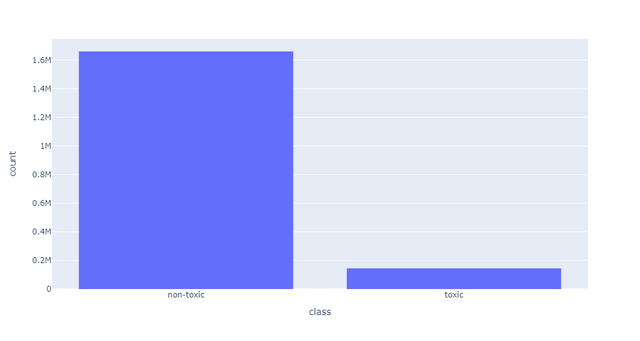

In [1]:
# <a href="https://ibb.co/SfddtLz"><img src="https://i.ibb.co/km994dt/Distribution-of-data.png" alt="Distribution-of-data" border="0"></a>
from IPython import display
display.Image("https://i.ibb.co/km994dt/Distribution-of-data.png")

In [19]:
(18-16.66)/18

0.07444444444444444

## Observation:
* `the given dataset is imbalance` where 92 % of data belong to non toxic class and 7 % data belongh to toxic class.

## 2. random sample from data which contain toxic and non toxic comment.

* Toxic Comment with its toxicity Scoere, and class.

In [156]:
for i in Data[['comment_text','target','class']][Data['class']=='toxic'][:5].values:
    print('Comment :\n' ,i[0])
    print('='*20)
    print('target :' ,i[1])
    print('='*20)
    print('class :' ,i[2])
    print('*'*100,'\n\n')

Comment :
 haha you guys are a bunch of losers.
target : 0.8936170212765957
class : toxic
**************************************************************************************************** 


Comment :
 ur a sh*tty comment.
target : 0.6666666666666666
class : toxic
**************************************************************************************************** 


Comment :
 It's ridiculous that these guys are being called "protesters". Being armed is a threat of violence, which makes them terrorists.
target : 0.6
class : toxic
**************************************************************************************************** 


Comment :
 This story gets more ridiculous by the hour! And, I love that people are sending these guys dildos in the mail now. But… if they really think there's a happy ending in this for any of them, I think they're even more deluded than all of the jokes about them assume.
target : 0.5
class : toxic
******************************************************

* Non Toxic Comment with its toxicity Scoere, and class.

In [157]:
for i in Data[['comment_text','target','class']][Data['class']=='non-toxic'][:5].values:
    print('Comment :\n' ,i[0])
    print('='*20)
    print('target :' ,i[1])
    print('='*20)
    print('class :' ,i[2])
    print('*'*100,'\n\n')

Comment :
 This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!
target : 0.0
class : non-toxic
**************************************************************************************************** 


Comment :
 Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!
target : 0.0
class : non-toxic
**************************************************************************************************** 


Comment :
 This is such an urgent design problem; kudos to you for taking it on. Very impressive!
target : 0.0
class : non-toxic
**************************************************************************************************** 


Comment :
 Is this something I'll be able to install on my site? When will you be releasing it?
target : 0.0
class : non-toxic
**************************************************************************************************** 


Comment :
 hahahahahahahahh

## 3. Checking number of NaN values in all subgroup.

In [ ]:
miss_val_train_df = train.isnull().sum(axis=0) / train_len
miss_val_train_df = miss_val_train_df[miss_val_train_df > 0] * 100
miss_val_train_df

In [233]:
miss_val_train_df = Data.isnull().sum(axis=0) / len(Data)

In [236]:
new_data = Data[[ 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white']]

In [237]:
Nan_values_percentage = new_data.isnull().sum(axis=0) / len(Data) *100

In [238]:
Nan_values_percentage

asian                                  77.553558
atheist                                77.553558
bisexual                               77.553558
black                                  77.553558
buddhist                               77.553558
christian                              77.553558
female                                 77.553558
heterosexual                           77.553558
hindu                                  77.553558
homosexual_gay_or_lesbian              77.553558
intellectual_or_learning_disability    77.553558
jewish                                 77.553558
latino                                 77.553558
male                                   77.553558
muslim                                 77.553558
other_disability                       77.553558
other_gender                           77.553558
other_race_or_ethnicity                77.553558
other_religion                         77.553558
other_sexual_orientation               77.553558
physical_disability 

### Observation:
* In all subgroup there are 77.55 %  comment having NAN values.
* after some experimentation i found that,all subgroup will have NAN value for particular comment or all subgroup will have some score for particular comment.
* it would be vary hard for us to find a patterns in this type of dataset.

## 4. How many comment are toxic when subclass is present and How many comment are non toxic when subclass is present 

In [44]:
new_data = Data[[ 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white','class']]

* as all subgroup have probability values we have to convert them into 0 or 1.
* first we will handle NAN values with "0" and then we will classify values, if values is more than 0.5 classify as "1" which means the word/subgroup/identity present in given comment and wise veras.
* important point to note that we are trying to understand that what are the effect of subgroup/identity in given comment.where identity present in comment.
* we will see tha effect on both class toxic as well non toxic.

In [45]:
new_data['asian'] = new_data['asian'].fillna(0)
new_data['asian'] = new_data['asian'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['atheist'] = new_data['atheist'].fillna(0)
new_data['atheist'] = new_data['atheist'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['bisexual'] = new_data['bisexual'].fillna(0)
new_data['bisexual'] = new_data['bisexual'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['black'] = new_data['black'].fillna(0)
new_data['black'] = new_data['black'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['buddhist'] = new_data['buddhist'].fillna(0)
new_data['buddhist'] = new_data['buddhist'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['christian'] = new_data['christian'].fillna(0)
new_data['christian'] = new_data['christian'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['female'] = new_data['female'].fillna(0)
new_data['female'] = new_data['female'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['heterosexual'] = new_data['heterosexual'].fillna(0)
new_data['heterosexual'] = new_data['heterosexual'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['hindu'] = new_data['hindu'].fillna(0)
new_data['hindu'] = new_data['hindu'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].fillna(0)
new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].fillna(0)
new_data['intellectual_or_learning_disability'] = new_data['intellectual_or_learning_disability'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['jewish'] = new_data['jewish'].fillna(0)
new_data['jewish'] = new_data['jewish'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['latino'] = new_data['latino'].fillna(0)
new_data['latino'] = new_data['latino'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['male'] = new_data['male'].fillna(0)
new_data['male'] = new_data['male'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['muslim'] = new_data['muslim'].fillna(0)
new_data['muslim'] = new_data['muslim'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_disability'] = new_data['other_disability'].fillna(0)
new_data['other_disability'] = new_data['other_disability'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_gender'] = new_data['other_gender'].fillna(0)
new_data['other_gender'] = new_data['other_gender'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].fillna(0)
new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_religion'] = new_data['other_religion'].fillna(0)
new_data['other_religion'] = new_data['other_religion'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].fillna(0)
new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['physical_disability'] = new_data['physical_disability'].fillna(0)
new_data['physical_disability'] = new_data['physical_disability'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].fillna(0)
new_data['psychiatric_or_mental_illness'] = new_data['psychiatric_or_mental_illness'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['transgender'] = new_data['transgender'].fillna(0)
new_data['transgender'] = new_data['transgender'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['white'] = new_data['white'].fillna(0)
new_data['white'] = new_data['white'].apply(lambda x: 0 if x < 0.5 else 1)

In [7]:
new_data.head()

asian  atheist  bisexual  black  buddhist  christian  female  heterosexual  \
0      0        0         0      0         0          0       0             0   
1      0        0         0      0         0          0       0             0   
2      0        0         0      0         0          0       0             0   
3      0        0         0      0         0          0       0             0   
4      0        0         0      0         0          0       0             0   

   hindu  homosexual_gay_or_lesbian  ...  other_disability  other_gender  \
0      0                          0  ...                 0             0   
1      0                          0  ...                 0             0   
2      0                          0  ...                 0             0   
3      0                          0  ...                 0             0   
4      0                          0  ...                 0             0   

   other_race_or_ethnicity  other_religion  other_sexual_orientation  \
0                        0               0                         0   
1                        0               0                         0   
2                        0               0                         0   
3                        0               0                         0   
4                        0               0                         0   

   physical_disability  psychiatric_or_mental_illness  transgender  white  \
0                    0                              0            0      0   
1                    0                              0            0      0   
2                    0                              0            0      0   
3                    0                              0            0      0   
4                    0                              0            0      0   

       class  
0  non-toxic  
1  non-toxic  
2  non-toxic  
3  non-toxic  
4      toxic  

[5 rows x 25 columns]

In [6]:
new_data_toxic = new_data[new_data['class']=='toxic']
new_data_non_toxic = new_data[new_data['class']=='non-toxic']

In [7]:
new_data_toxic

asian  atheist  bisexual  black  buddhist  christian  female  \
4            0        0         0      0         0          0       0   
5            0        0         0      0         0          0       0   
13           0        0         0      0         0          0       0   
14           0        0         0      0         0          0       0   
19           0        0         0      0         0          0       0   
...        ...      ...       ...    ...       ...        ...     ...   
1804825      0        0         0      0         0          0       0   
1804838      0        0         0      0         0          0       0   
1804856      0        1         0      0         0          0       0   
1804857      0        0         0      0         0          0       0   
1804872      0        0         0      0         0          0       0   

         heterosexual  hindu  homosexual_gay_or_lesbian  ...  \
4                   0      0                          0  ...   
5                   0      0                          0  ...   
13                  0      0                          0  ...   
14                  0      0                          0  ...   
19                  0      0                          0  ...   
...               ...    ...                        ...  ...   
1804825             0      0                          0  ...   
1804838             0      0                          0  ...   
1804856             0      0                          0  ...   
1804857             0      0                          0  ...   
1804872             0      0                          0  ...   

         other_disability  other_gender  other_race_or_ethnicity  \
4                       0             0                        0   
5                       0             0                        0   
13                      0             0                        0   
14                      0             0                        0   
19                      0             0                        0   
...                   ...           ...                      ...   
1804825                 0             0                        0   
1804838                 0             0                        0   
1804856                 0             0                        0   
1804857                 0             0                        0   
1804872                 0             0                        0   

         other_religion  other_sexual_orientation  physical_disability  \
4                     0                         0                    0   
5                     0                         0                    0   
13                    0                         0                    0   
14                    0                         0                    0   
19                    0                         0                    0   
...                 ...                       ...                  ...   
1804825               0                         0                    0   
1804838               0                         0                    0   
1804856               0                         0                    0   
1804857               0                         0                    0   
1804872               0                         0                    0   

         psychiatric_or_mental_illness  transgender  white  class  
4                                    0            0      0  toxic  
5                                    0            0      0  toxic  
13                                   0            0      0  toxic  
14                                   0            0      0  toxic  
19                                   0            0      0  toxic  
...                                ...          ...    ...    ...  
1804825                              0            0      0  toxic  
1804838                              0            0      0  toxic  
1804856                              0       

In [10]:
new_data_non_toxic

asian  atheist  bisexual  black  buddhist  christian  female  \
0            0        0         0      0         0          0       0   
1            0        0         0      0         0          0       0   
2            0        0         0      0         0          0       0   
3            0        0         0      0         0          0       0   
6            0        0         0      0         0          0       0   
...        ...      ...       ...    ...       ...        ...     ...   
1804868      0        0         0      0         0          0       0   
1804869      0        0         0      0         0          0       0   
1804870      0        0         0      0         0          0       0   
1804871      0        0         0      0         0          0       0   
1804873      0        0         0      0         0          0       0   

         heterosexual  hindu  homosexual_gay_or_lesbian  ...  \
0                   0      0                          0  ...   
1                   0      0                          0  ...   
2                   0      0                          0  ...   
3                   0      0                          0  ...   
6                   0      0                          0  ...   
...               ...    ...                        ...  ...   
1804868             0      0                          0  ...   
1804869             0      0                          0  ...   
1804870             0      0                          0  ...   
1804871             0      0                          0  ...   
1804873             0      0                          0  ...   

         other_disability  other_gender  other_race_or_ethnicity  \
0                       0             0                        0   
1                       0             0                        0   
2                       0             0                        0   
3                       0             0                        0   
6                       0             0                        0   
...                   ...           ...                      ...   
1804868                 0             0                        0   
1804869                 0             0                        0   
1804870                 0             0                        0   
1804871                 0             0                        0   
1804873                 0             0                        0   

         other_religion  other_sexual_orientation  physical_disability  \
0                     0                         0                    0   
1                     0                         0                    0   
2                     0                         0                    0   
3                     0                         0                    0   
6                     0                         0                    0   
...                 ...                       ...                  ...   
1804868               0                         0                    0   
1804869               0                         0                    0   
1804870               0                         0                    0   
1804871               0                         0                    0   
1804873               0                         0                    0   

         psychiatric_or_mental_illness  transgender  white      class  
0                                    0            0      0  non-toxic  
1                                    0            0      0  non-toxic  
2                                    0            0      0  non-toxic  
3                                    0            0      0  non-toxic  
6                                    0            0      0  non-toxic  
...                                ...          ...    ...        ...  
1804868                              0            0      0  non-toxic  
1804869                              0            0      0  non-toxic  
1804870  

In [15]:
# temp_toxic = list(new_data_toxic.sum(axis = 0))
# temp_toxic = list(new_data_toxic.sum(axis = 0))  ----> this way takes lot of time.
temp_toxic=[]
for i in new_data_non_toxic.columns[:24]:
    temp_toxic.append(new_data_toxic[i].sum(axis=0))

In [12]:
# temp_non_toxic = new_data_non_toxic['asian'].sum(axis = 0)  ----> this way takes lot of time.
temp_non_toxic=[]
for i in new_data_non_toxic.columns[:24]:
    temp_non_toxic.append(new_data_non_toxic[i].sum(axis=0))
    

In [4]:
# # https://plotly.com/python/bar-charts/
# import plotly.graph_objects as go

# Subgroups = list(new_data_non_toxic.columns[:24])

# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=Subgroups,
#     y=temp_toxic,
#     name='num of toxic comment when subgroup is true',
#     marker_color='indianred'
# ))
# fig.add_trace(go.Bar(
#     x=Subgroups,
#     y=temp_non_toxic,
#     name='num of non toxic comment when subgroup is true',
#     marker_color='lightsalmon'
# ))

# # Here we modify the tickangle of the xaxis, resulting in rotated labels.
# fig.update_layout(barmode='group', xaxis_tickangle=-45)
# fig.show()

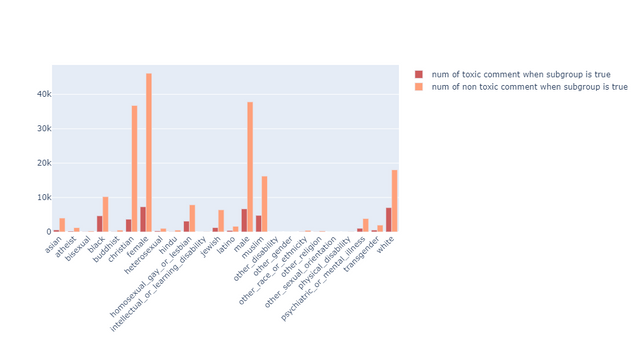

In [3]:
from IPython import display
display.Image("https://i.ibb.co/GvRD28F/subgroup-comp.png")

### Observation:
* i am not too sure,  as data i imbalance  but i can say that there is possibility that model might give wrong result due to same identity present in both class.


## 5.  Distribution of  subclass based on Toxic and Non-toxic comment.

In [35]:
new_data = Data[['severe_toxicity','obscene','threat','insult','identity_attack','sexual_explicit','class']]

In [36]:
new_data['severe_toxicity'] = new_data['severe_toxicity'].fillna(0)
new_data['severe_toxicity'] = new_data['severe_toxicity'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['obscene'] = new_data['obscene'].fillna(0)
new_data['obscene'] = new_data['obscene'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['threat'] = new_data['threat'].fillna(0)
new_data['threat'] = new_data['threat'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['insult'] = new_data['insult'].fillna(0)
new_data['insult'] = new_data['insult'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['identity_attack'] = new_data['identity_attack'].fillna(0)
new_data['identity_attack'] = new_data['identity_attack'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['sexual_explicit'] = new_data['sexual_explicit'].fillna(0)
new_data['sexual_explicit'] = new_data['sexual_explicit'].apply(lambda x: 0 if x < 0.5 else 1)


In [38]:
# temp_toxic = list(new_data_toxic.sum(axis = 0))
# temp_toxic = list(new_data_toxic.sum(axis = 0))  ----> this way takes lot of time.
temp_Score=[]
for i in new_data.columns[:6]:
    temp_Score.append(new_data[i].sum(axis=0))

In [40]:
temp_Score

[13, 9603, 4280, 106534, 13410, 4686]

In [6]:
# # https://plotly.com/python/bar-charts/
# import plotly.graph_objects as go

# Subgroups = list(new_data.columns[:6])

# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=Subgroups,
#     y=temp_Score,
#     name='Distribution of subclasses',
#     marker_color='indianred'
# ))


# # Here we modify the tickangle of the xaxis, resulting in rotated labels.
# fig.update_layout(barmode='group', xaxis_tickangle=-45)
# fig.show()

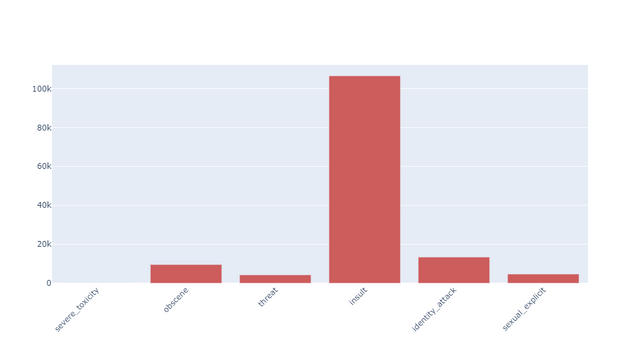

In [5]:
from IPython import display
display.Image("https://i.ibb.co/F0KRFQY/distribution-of-subclass.png")

### Observation :
* we can see that there are higher number of comment which belong to insult subclass amoungs all.

## 6. Lats focus on comment_text column.

### In this section we will create some simple hand made feature based on comment.
* Number of words in comment
* number of letter in comment
* number of special symbol in comment.
* `we are tring to understand will thses of feature  help us to classify comment.` 

In [22]:
Data['num_words'] = [len(sent.split()) for sent in Data['comment_text']]

In [24]:
Data[['comment_text', 'num_words','class']].head()

comment_text  num_words      class
0  This is so cool. It's like, 'would you want yo...         19  non-toxic
1  Thank you!! This would make my life a lot less...         22  non-toxic
2  This is such an urgent design problem; kudos t...         16  non-toxic
3  Is this something I'll be able to install on m...         17  non-toxic
4               haha you guys are a bunch of losers.          8      toxic

### 1. Distribution of num_words in toxic comment

In [31]:
toxic = Data['num_words'][Data['class']=='toxic']
Non_toxic = Data['num_words'][Data['class']=='non-toxic']

In [46]:
import warnings
warnings.filterwarnings("ignore")

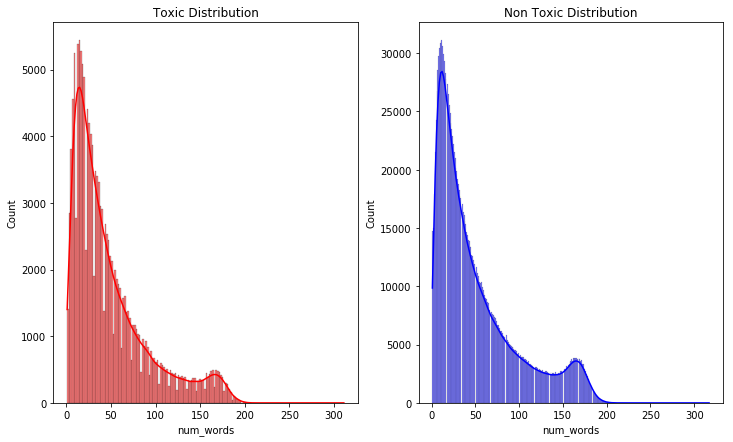

In [47]:
import matplotlib.pyplot as plt     
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(12,7))
sns.histplot(toxic, kde= True, ax=ax[0], color= 'r')
sns.histplot(Non_toxic, kde= True, ax=ax[1], color= 'b')
ax[0].set_title("Toxic Distribution")
ax[1].set_title("Non Toxic Distribution")
plt.show();

### 2. Distribution of number of character in comment_text

In [58]:
for i in Data['comment_text']:
    print(len(i))
#     temp = i.split()
#     print(i.split())
#     print(len(i.split()))
# #     print(i.split())
#     for j in temp:
#         print(j)
#         print(j.split())
#         break
    break

101


In [59]:
Data['num_characters'] = [len(sent) for sent in Data['comment_text']]

In [60]:
toxic = Data['num_characters'][Data['class']=='toxic']
Non_toxic = Data['num_characters'][Data['class']=='non-toxic']

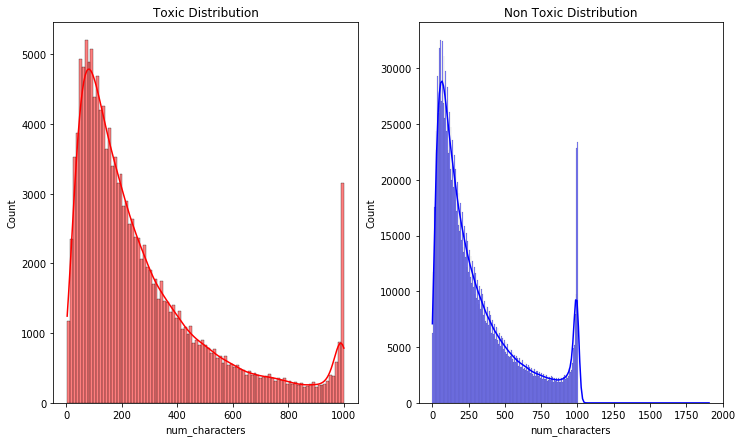

In [61]:
import matplotlib.pyplot as plt     
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(12,7))
sns.histplot(toxic, kde= True, ax=ax[0], color= 'r')
sns.histplot(Non_toxic, kde= True, ax=ax[1], color= 'b')
ax[0].set_title("Toxic Distribution")
ax[1].set_title("Non Toxic Distribution")
plt.show();

### 3. Distribution of number of Special Character in comment_text

In [107]:
## refrence  : https://www.codespeedy.com/count-the-number-of-special-characters-in-a-string-in-python/
def count_special_character(string): 
    string = string.replace(' ','')
    # Declaring variable for special characters 
    special_char= 0
   
    for i in range(0, len(string)): 
        spe_char=[]
    # len(string) function to count the 
    # number of characters in given string.
      
        ch = string[i]
  
        #.isalpha() function checks whether character 
        #is alphabet or not.
        if (string[i].isalpha()):  
            continue
        
        #.isdigit() function checks whether character 
        #is a number or not.
        elif (string[i].isdigit()):
            continue
            
        else: 
            special_char += 1
       
    return  special_char   
        
#     if special_char >= 1:    
#         print("String contains {} Special Character/s ".format(special_char))  
#     else:
#         print("There are no Special Characters in this String.")

In [112]:
Data['num_special_char'] = [count_special_character(sent) for sent in Data['comment_text']]

In [114]:
toxic = Data['num_special_char'][Data['class']=='toxic']
Non_toxic = Data['num_special_char'][Data['class']=='non-toxic']

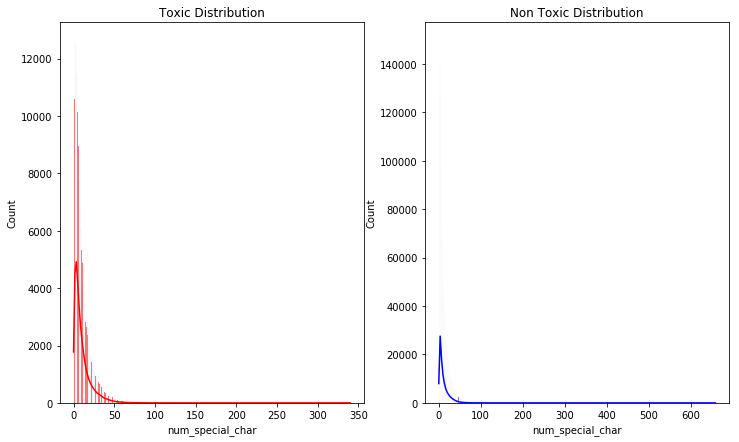

In [116]:
import matplotlib.pyplot as plt     
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(12,7))
sns.histplot(toxic, kde= True, ax=ax[0], color= 'r')
sns.histplot(Non_toxic, kde= True, ax=ax[1], color= 'b')
ax[0].set_title("Toxic Distribution")
ax[1].set_title("Non Toxic Distribution")
plt.show();

### Overall Observation:
* 90 percentile of the comment having length<=65
* we can see that both having follow same distribution and overlap on each other, not find much information not much useful.
* the new feature we made is not so useful.

## 7.  WordCloud on Toxic and Non Toxic comment.

* https://www.datacamp.com/community/tutorials/wordcloud-python
* A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

In [7]:
from nltk.tokenize import TweetTokenizer   
from wordcloud import WordCloud, STOPWORDS

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stopwords = STOPWORDS

### 1.  WordCloud on Whole data.

In [5]:
word_cloud_non_toxic = Data[Data['class'] == "non-toxic"][['comment_text']]
word_cloud_toxic = Data[Data['class'] == "toxic"][['comment_text']]

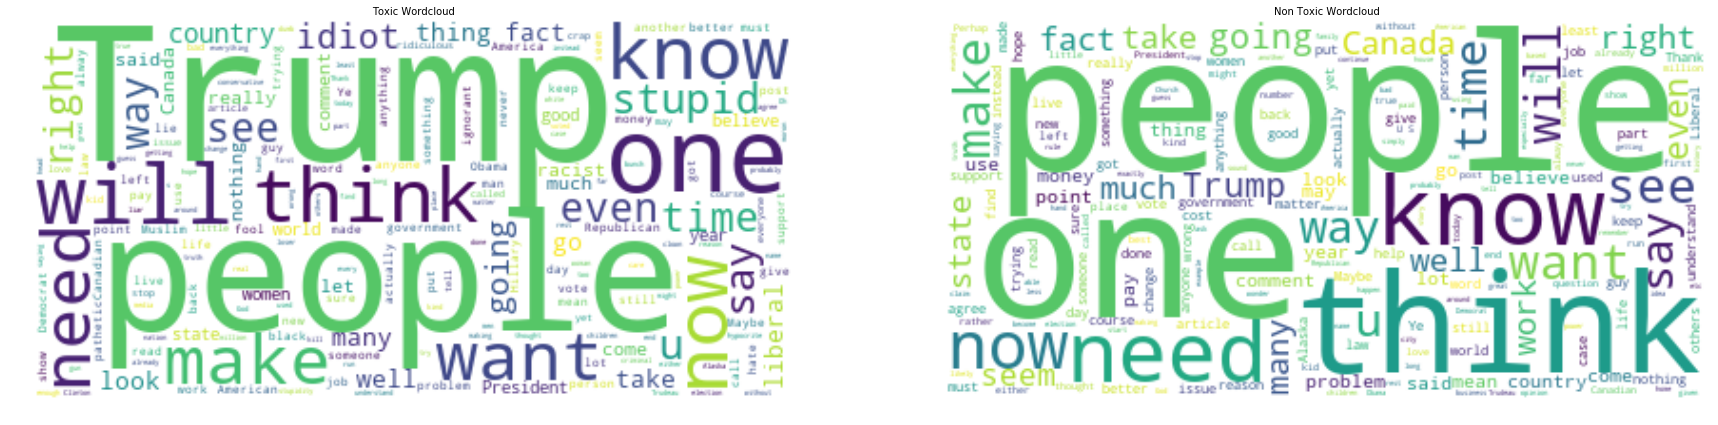

In [27]:

wordcloud_non = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                        
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_non_toxic['comment_text']))

wordcloud_toxic = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                  
                          max_font_size=100, 
#                           random_state=42
                         ).generate(' '. join(word_cloud_toxic['comment_text']))

fig = plt.figure(figsize=[30,20])
# plt.suptitle('Non Normalized Text', size = 25)

fig.add_subplot(1, 2, 1).set_title("Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_toxic, interpolation="bilinear")
plt.axis("off")

fig.add_subplot(1, 2, 2).set_title("Non Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_non, interpolation="bilinear")
plt.axis("off")

plt.show()

In [10]:
import matplotlib.pyplot as plt     

### 2. WorldCloud on random subgroups.

In [18]:
new_data = Data[['comment_text' ,'hindu',
       'homosexual_gay_or_lesbian', 'muslim',
     'other_race_or_ethnicity',
       'other_sexual_orientation',
        'transgender', 'white','class']]

In [43]:

new_data['hindu'] = new_data['hindu'].fillna(0)
new_data['hindu'] = new_data['hindu'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].fillna(0)
new_data['homosexual_gay_or_lesbian'] = new_data['homosexual_gay_or_lesbian'].apply(lambda x: 0 if x < 0.5 else 1)


new_data['muslim'] = new_data['muslim'].fillna(0)
new_data['muslim'] = new_data['muslim'].apply(lambda x: 0 if x < 0.5 else 1)


new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].fillna(0)
new_data['other_race_or_ethnicity'] = new_data['other_race_or_ethnicity'].apply(lambda x: 0 if x < 0.5 else 1)


new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].fillna(0)
new_data['other_sexual_orientation'] = new_data['other_sexual_orientation'].apply(lambda x: 0 if x < 0.5 else 1)


new_data['transgender'] = new_data['transgender'].fillna(0)
new_data['transgender'] = new_data['transgender'].apply(lambda x: 0 if x < 0.5 else 1)

new_data['white'] = new_data['white'].fillna(0)
new_data['white'] = new_data['white'].apply(lambda x: 0 if x < 0.5 else 1)

####  1. Subgroup/identity = homosexual_gay_or_lesbian

In [31]:
word_cloud_non_toxic = new_data[(new_data['class'] == "non-toxic" ) & ( new_data['homosexual_gay_or_lesbian']==1) ][['comment_text']]
word_cloud_toxic = new_data[(new_data['class'] == "toxic") & (new_data['homosexual_gay_or_lesbian']==1)][['comment_text']]

In [179]:
## Not best way to merge all comment in single string 
# word_cloud_non_toxic_ = ''
# for i in word_cloud_non_toxic.values:
#     word_cloud_non_toxic_ = word_cloud_non_toxic_+' '+i

In [182]:
# word_cloud_toxic_ = ''
# for i in word_cloud_toxic.values:
#     word_cloud_toxic_ = word_cloud_toxic_+' '+i

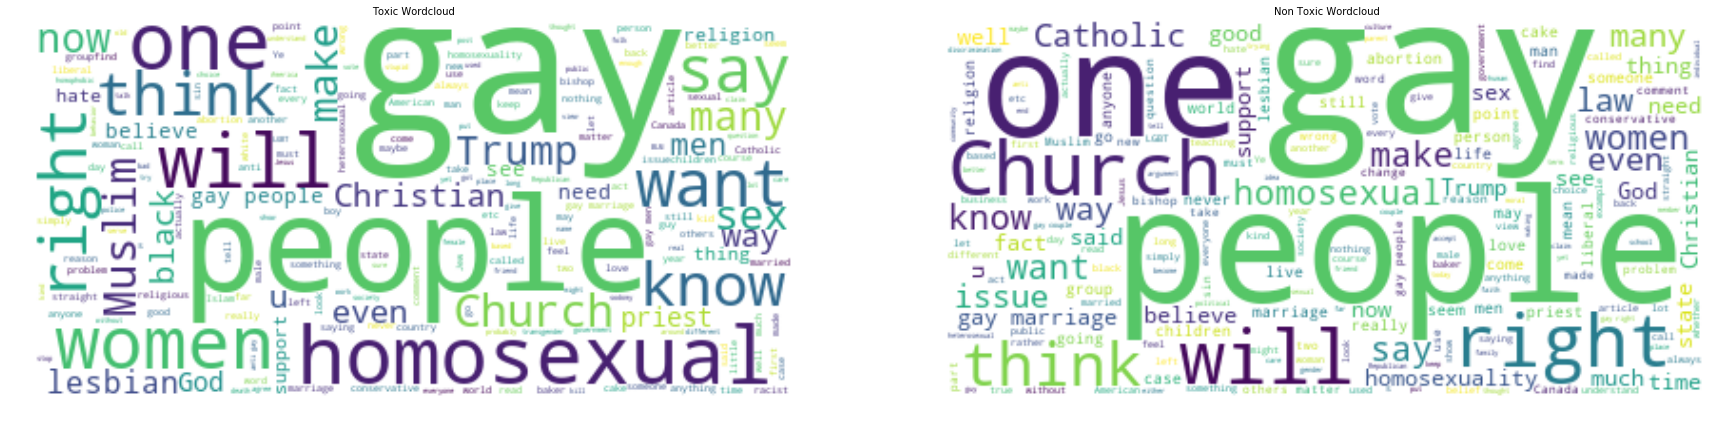

In [32]:


wordcloud_non = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                        
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_non_toxic['comment_text']))

wordcloud_toxic = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                  
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_toxic['comment_text']))

fig = plt.figure(figsize=[30,20])
# plt.suptitle('Non Normalized Text', size = 25)

fig.add_subplot(1, 2, 1).set_title("Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_toxic, interpolation="bilinear")
plt.axis("off")

fig.add_subplot(1, 2, 2).set_title("Non Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_non, interpolation="bilinear")
plt.axis("off")

plt.show()

####  2. Subgroup/identity = transgender

In [33]:
word_cloud_non_toxic = new_data[(new_data['class'] == "non-toxic" ) & ( new_data['transgender']==1) ][['comment_text']]
word_cloud_toxic = new_data[(new_data['class'] == "toxic") & (new_data['transgender']==1)][['comment_text']]

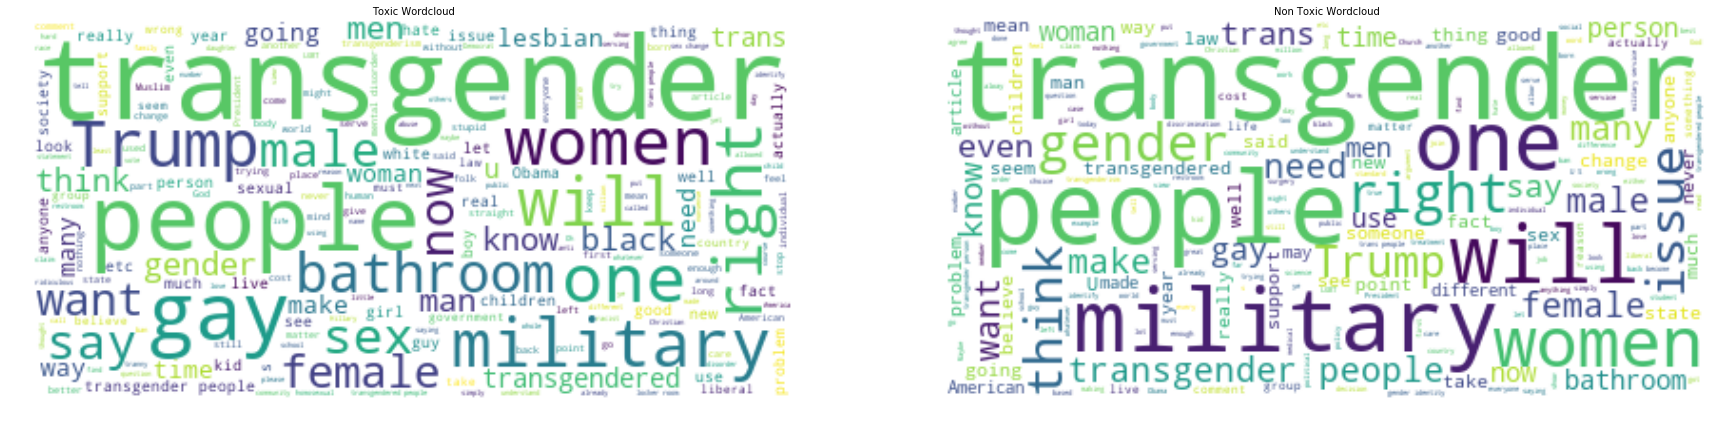

In [34]:


wordcloud_non = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                        
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_non_toxic['comment_text']))

wordcloud_toxic = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                  
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_toxic['comment_text']))

fig = plt.figure(figsize=[30,20])
# plt.suptitle('Non Normalized Text', size = 25)

fig.add_subplot(1, 2, 1).set_title("Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_toxic, interpolation="bilinear")
plt.axis("off")

fig.add_subplot(1, 2, 2).set_title("Non Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_non, interpolation="bilinear")
plt.axis("off")

plt.show()

####  3. Subgroup/identity = other_race_or_ethnicity

In [35]:
word_cloud_non_toxic = new_data[(new_data['class'] == "non-toxic" ) & ( new_data['other_race_or_ethnicity']==1) ][['comment_text']]
word_cloud_toxic = new_data[(new_data['class'] == "toxic") & (new_data['other_race_or_ethnicity']==1)][['comment_text']]

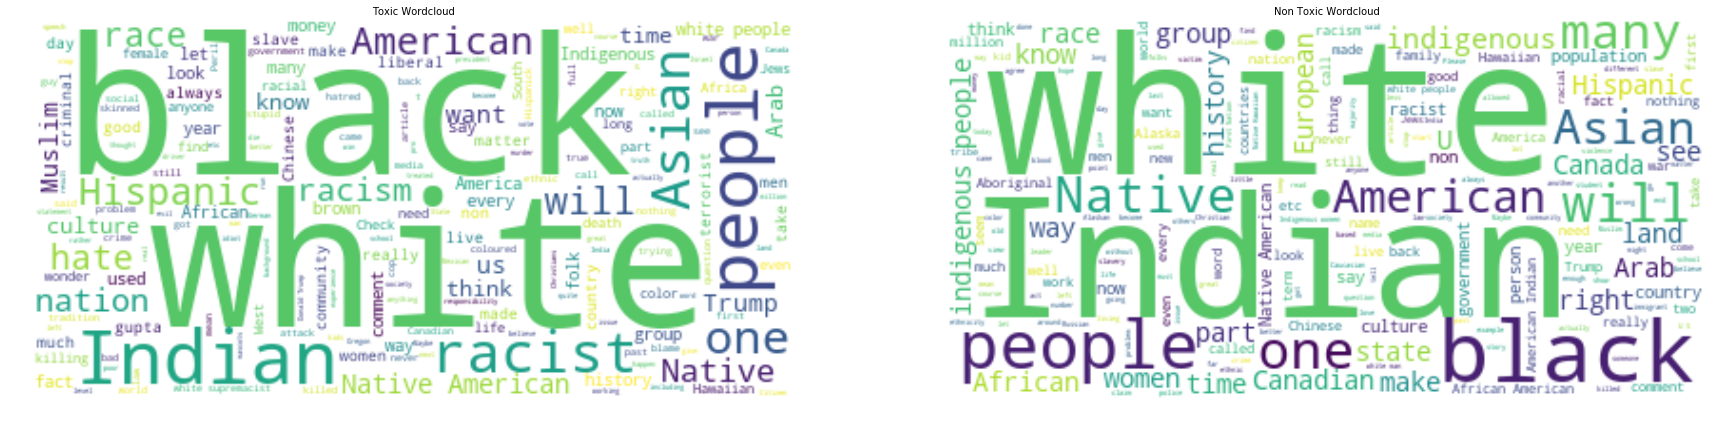

In [36]:
wordcloud_non = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                        
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_non_toxic['comment_text']))

wordcloud_toxic = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                  
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_toxic['comment_text']))

fig = plt.figure(figsize=[30,20])
# plt.suptitle('Non Normalized Text', size = 25)

fig.add_subplot(1, 2, 1).set_title("Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_toxic, interpolation="bilinear")
plt.axis("off")

fig.add_subplot(1, 2, 2).set_title("Non Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_non, interpolation="bilinear")
plt.axis("off")

plt.show()

####  4. Subgroup/identity = hindu

In [40]:
word_cloud_non_toxic = new_data[(new_data['class'] == "non-toxic" ) & ( new_data['hindu']==1) ][['comment_text']]
word_cloud_toxic = new_data[(new_data['class'] == "toxic") & (new_data['hindu']==1)][['comment_text']]

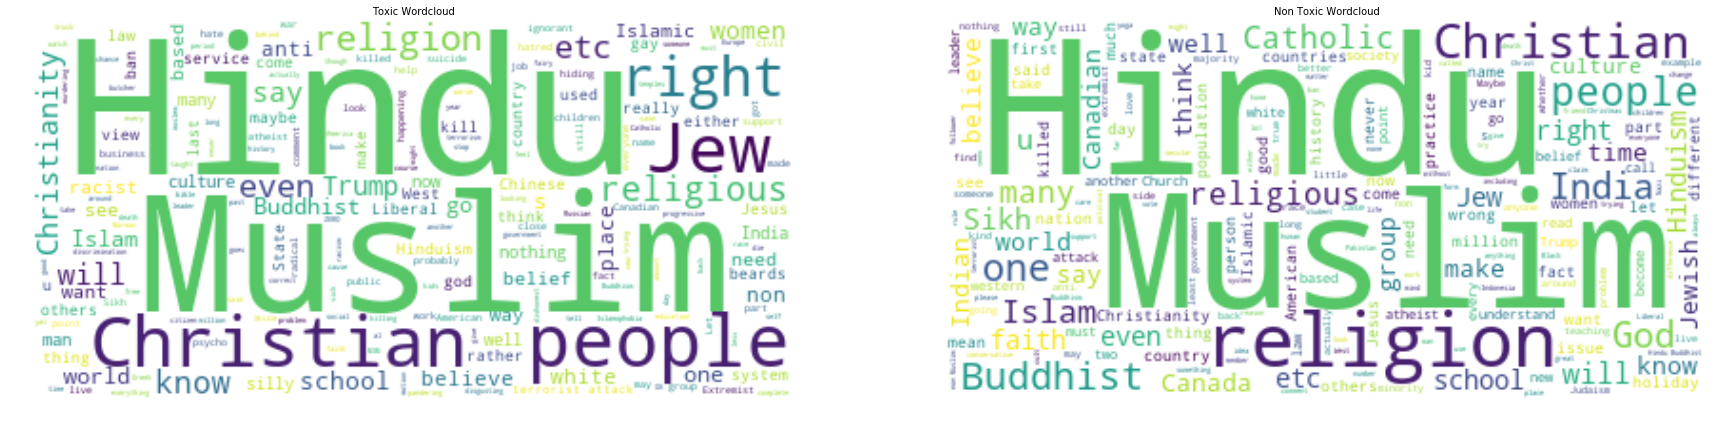

In [41]:
wordcloud_non = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                        
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_non_toxic['comment_text']))

wordcloud_toxic = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                  
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_toxic['comment_text']))

fig = plt.figure(figsize=[30,20])
# plt.suptitle('Non Normalized Text', size = 25)

fig.add_subplot(1, 2, 1).set_title("Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_toxic, interpolation="bilinear")
plt.axis("off")

fig.add_subplot(1, 2, 2).set_title("Non Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_non, interpolation="bilinear")
plt.axis("off")

plt.show()

#### 5. Subgroup/identity = muslim

In [38]:
word_cloud_non_toxic = new_data[(new_data['class'] == "non-toxic" ) & ( new_data['muslim']==1) ][['comment_text']]
word_cloud_toxic = new_data[(new_data['class'] == "toxic") & (new_data['muslim']==1)][['comment_text']]

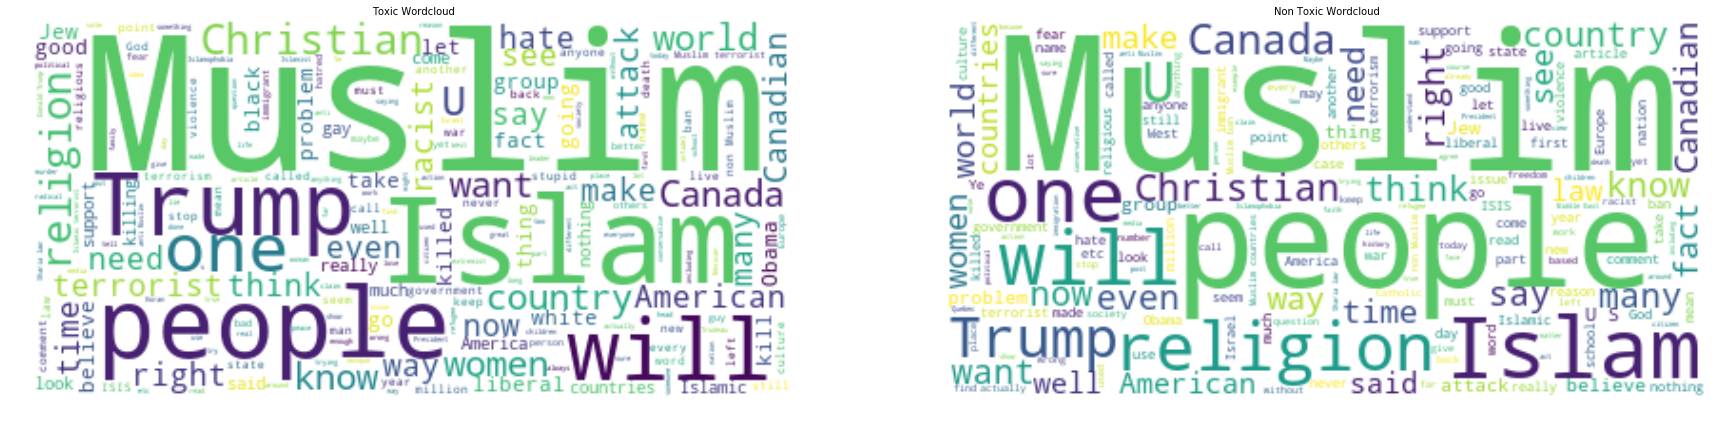

In [39]:


wordcloud_non = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                        
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_non_toxic['comment_text']))

wordcloud_toxic = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                  
                          max_font_size=100, 
                          random_state=42
                         ).generate(' '. join(word_cloud_toxic['comment_text']))

fig = plt.figure(figsize=[30,20])
# plt.suptitle('Non Normalized Text', size = 25)

fig.add_subplot(1, 2, 1).set_title("Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_toxic, interpolation="bilinear")
plt.axis("off")

fig.add_subplot(1, 2, 2).set_title("Non Toxic Wordcloud", fontsize=10)
plt.imshow(wordcloud_non, interpolation="bilinear")
plt.axis("off")

plt.show()

### Observation :
* In all the word cloud graph we can see that there are lots of word are present in both the classes. and important part is that it occure most/considerable amount of time.
* this will be the reasone , while training model get confuse, which result in model show some biases, while prediction the comment.
* so while designing the architecture we have to keep in mind that model should not overfit or not over learn. 

# Overall Observation:
1. The given data set is Severely imbalance, 92% data belong to non toxic comment and 8 % data belong to  toxic comment.
2. in the given dataset there are lots of feature are avaiable(subgroup/identity) but the problem is that 77 %  of data  contain NAN values. which might not be so usefull.
3. the simple featur like number of word ,number of character in comment  ist good enough to classify the comment.
4. word cloud is good way to compare any documents.
5. so  while preparing data we only consider comment_text featur.rest of the data we will drop.